In [1]:
!python3 --version
!pip3 list

Python 3.8.10
Package                 Version
----------------------- --------------------
absl-py                 0.13.0
anyio                   3.2.1
appdirs                 1.4.3
apturl                  0.5.2
argon2-cffi             20.1.0
astunparse              1.6.3
async-generator         1.10
attrs                   21.2.0
autopep8                1.5.7
Babel                   2.9.1
backcall                0.2.0
beautifulsoup4          4.9.3
bitarray                2.3.3
bleach                  3.3.0
blinker                 1.4
Brlapi                  0.7.0
cachetools              4.2.2
certifi                 2019.11.28
cffi                    1.14.5
chardet                 3.0.4
chrome-gnome-shell      0.0.0
clang                   5.0
Click                   7.0
colorama                0.4.3
command-not-found       0.3
cryptography            2.8
cupshelpers             1.0
cycler                  0.10.0
dbus-python             1.2.16
decorator               5.0.9
defer      

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
import os
import pandas as pd
import numpy as np
import modules.model as Model
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

# Build the Emoji sentiment model
* Phần này, ta sẽ đào tạo một **emoji sentiment model**.

Đọc training data.

In [4]:
X_train, y_train = Model.loadData("./data/emoji_data/train")

In [5]:
display(X_train.head(), y_train.head())

,raw_comment,normalize_comment,emoji_decode
0,Cái 9k đẹp hơn.Cái 9k kiểu bóng trông đẹp hơn ...,cái không đẹp hơn cái không kiểu bóng trông đẹ...,heart_eyes
1,Mũ xinh hihi chờ hàng hơi lâu tý nhưng nhận dk...,mũ xinh chờ hàng hơi lâu tý nhưng nhận ưng lắm...,kissing_heart kissing_heart kissing_heart hear...
2,Thời gian giao hàng rất chậm !\nHàng giao đủ s...,thời gian giao hàng rất chậm hàng giao đủ số l...,relieved
3,"Áo không biết là mới hay k á, nhưng mà có vết ...",áo không biết là mới hay không á nhưng mà có v...,sob sob sob persevere persevere persevere pers...
4,Da mềm êm rất đẹp nhé❤️cúc bấm cũng chắc chắn ...,da mềm êm rất đẹp nhé cúc bấm cũng chắc chắn x...,heart heart


,label
0,0
1,1
2,0
3,1
4,1


Hãy xem lại các emoji của chúng ta phân bổ như thế nào, thứ mà chúng ta đã không quan tâm lắm ở project 2.

In [6]:
emoji_stat = Model.reviewStatistic(X_train['emoji_decode'], True)

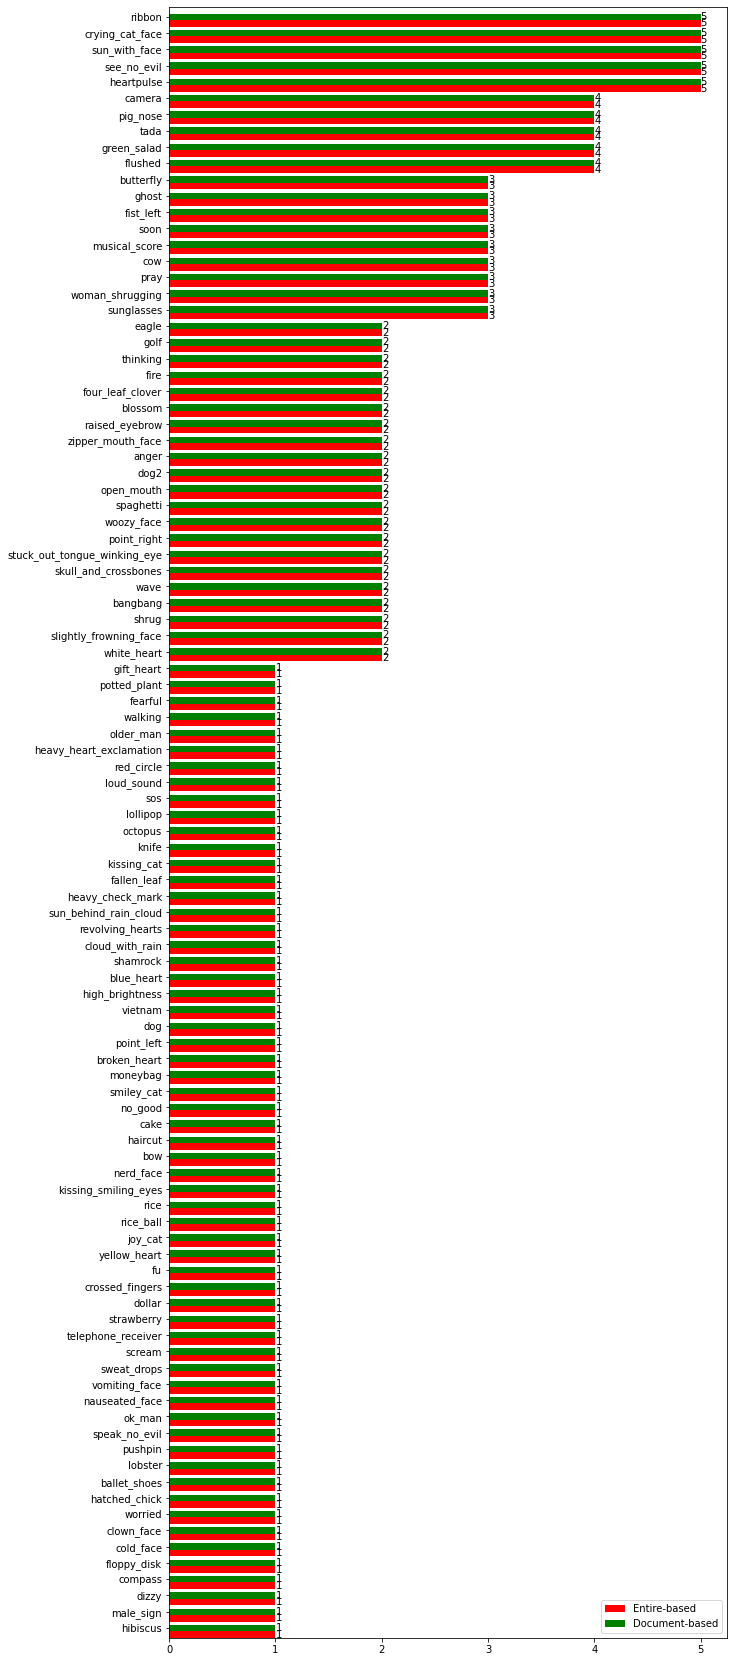

In [7]:
Model.wordFrequencyBarplot(emoji_stat.head(100))

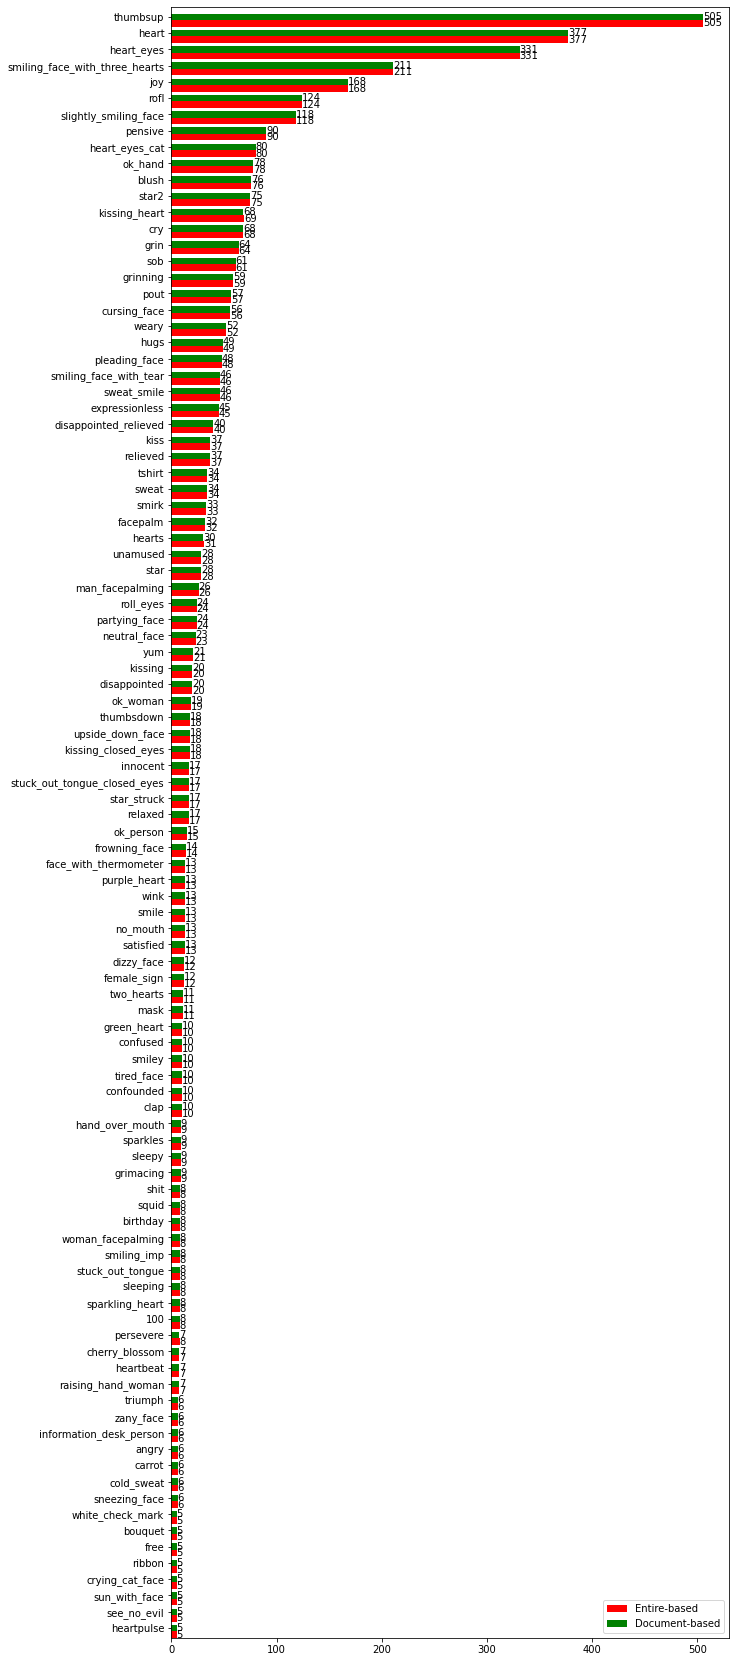

In [8]:
Model.wordFrequencyBarplot(emoji_stat.tail(100))

In [9]:
vectorizer = [
    ("Bag of Words", Model.vectorizer(X_train['emoji_decode'], 'bow')),
    ("TF-IDF", Model.vectorizer(X_train['emoji_decode'], 'tfidf')),
    ("Bag of Words - [min_df: 5]", Model.vectorizer(X_train['emoji_decode'], 'bow', 5)),
    ("TF-IDF - [min_df: 5]", Model.vectorizer(X_train['emoji_decode'], 'tfidf', 5))
]

In [10]:
print(vectorizer[0][1][0].get_feature_names())
pd.DataFrame(data=vectorizer[0][1][1].toarray(), columns=vectorizer[0][1][0].get_feature_names())

['100', 'anger', 'angry', 'ballet_shoes', 'bangbang', 'birthday', 'blossom', 'blue_heart', 'blush', 'bouquet', 'bow', 'broken_heart', 'butterfly', 'cake', 'camera', 'carrot', 'cherry_blossom', 'clap', 'cloud_with_rain', 'clown_face', 'cold_face', 'cold_sweat', 'compass', 'confounded', 'confused', 'cow', 'crossed_fingers', 'cry', 'crying_cat_face', 'cursing_face', 'disappointed', 'disappointed_relieved', 'dizzy', 'dizzy_face', 'dog', 'dog2', 'dollar', 'eagle', 'expressionless', 'face_with_thermometer', 'facepalm', 'fallen_leaf', 'fearful', 'female_sign', 'fire', 'fist_left', 'floppy_disk', 'flushed', 'four_leaf_clover', 'free', 'frowning_face', 'fu', 'ghost', 'gift_heart', 'golf', 'green_heart', 'green_salad', 'grimacing', 'grin', 'grinning', 'haircut', 'hand_over_mouth', 'hatched_chick', 'heart', 'heart_eyes', 'heart_eyes_cat', 'heartbeat', 'heartpulse', 'hearts', 'heavy_check_mark', 'heavy_heart_exclamation', 'hibiscus', 'high_brightness', 'hugs', 'information_desk_person', 'innocent'

,100,anger,angry,ballet_shoes,bangbang,birthday,blossom,blue_heart,blush,bouquet,...,white_heart,wink,woman_facepalming,woman_shrugging,woozy_face,worried,yellow_heart,yum,zany_face,zipper_mouth_face
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1023,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1024,0,0,0,0,0,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
pd.DataFrame(data=vectorizer[1][1][1].toarray(), columns=vectorizer[1][1][0].get_feature_names())

,100,anger,angry,ballet_shoes,bangbang,birthday,blossom,blue_heart,blush,bouquet,...,white_heart,wink,woman_facepalming,woman_shrugging,woozy_face,worried,yellow_heart,yum,zany_face,zipper_mouth_face
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.713115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
lst_models = [
    ('Logistic Regression - [solver: lbfgs]', LogisticRegression(solver='lbfgs')),
    ('Logistic Regression - [solver: liblinear]', LogisticRegression(solver='liblinear')),
    ('Logistic Regression - [solver: newton-cg]', LogisticRegression(solver='newton-cg')),
    ('KNN - [n_neighbors: 2]', KNeighborsClassifier(n_neighbors=2)),
    ('KNN - [n_neighbors: 3]', KNeighborsClassifier(n_neighbors=3)),
    ('SVC - [kernel: linear]', SVC(kernel='linear', random_state=42)),
    ('SVC - [kernel: poly]', SVC(kernel='poly', random_state=42)),
    ('SVC - [kernel: rbf]', SVC(kernel='rbf', random_state=42)),
    ('SVC - [kernel: sigmoid]', SVC(kernel='sigmoid', random_state=42)),
    ('Bernoulli', BernoulliNB()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(eval_metric='mlogloss'))
]

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [13]:
original_models = Model.train(lst_models, vectorizer, y_train, cv)

original_models

Bag of Words:
	Model Logistic Regression - [solver: lbfgs] has been trained in 0.24 seconds
	Model Logistic Regression - [solver: liblinear] has been trained in 0.07 seconds
	Model Logistic Regression - [solver: newton-cg] has been trained in 0.29 seconds
	Model KNN - [n_neighbors: 2] has been trained in 0.58 seconds
	Model KNN - [n_neighbors: 3] has been trained in 0.62 seconds
	Model SVC - [kernel: linear] has been trained in 0.32 seconds
	Model SVC - [kernel: poly] has been trained in 0.41 seconds
	Model SVC - [kernel: rbf] has been trained in 0.45 seconds
	Model SVC - [kernel: sigmoid] has been trained in 0.40 seconds
	Model Bernoulli has been trained in 0.09 seconds
	Model Random Forest has been trained in 2.63 seconds
	Model XGBoost has been trained in 1.46 seconds
TF-IDF:
	Model Logistic Regression - [solver: lbfgs] has been trained in 0.16 seconds
	Model Logistic Regression - [solver: liblinear] has been trained in 0.06 seconds
	Model Logistic Regression - [solver: newton-cg] h

,vectorizer,model,train_acc,test_acc,diff_acc,train_acc_std,test_acc_std,train_roc_auc,test_roc_auc,diff_roc_auc,train_roc_auc_std,test_roc_auc_std,fit_time
0,TF-IDF,SVC - [kernel: rbf],0.893546,0.851875,0.041671,0.003487,0.038218,0.905123,0.873282,0.031841,0.016902,0.033987,0.011112
1,TF-IDF,Logistic Regression - [solver: liblinear],0.890189,0.850866,0.039322,0.004251,0.033072,0.930616,0.903272,0.027344,0.003066,0.036520,0.001520
2,TF-IDF,Logistic Regression - [solver: lbfgs],0.890189,0.850866,0.039322,0.004251,0.033072,0.930633,0.903188,0.027445,0.003078,0.036723,0.010701
3,TF-IDF,Logistic Regression - [solver: newton-cg],0.890189,0.850866,0.039322,0.004251,0.033072,0.930635,0.903188,0.027447,0.003078,0.036723,0.013588
4,TF-IDF,Random Forest,0.900802,0.847944,0.052858,0.003933,0.045535,0.957656,0.897262,0.060395,0.002273,0.035206,0.185842
5,TF-IDF,SVC - [kernel: poly],0.896578,0.847002,0.049576,0.003524,0.039243,0.905438,0.854690,0.050747,0.006277,0.044771,0.011035
6,Bag of Words,Bernoulli,0.882933,0.845012,0.037920,0.003072,0.034061,0.937264,0.898412,0.038853,0.002624,0.032872,0.001855
7,TF-IDF,Bernoulli,0.882933,0.845012,0.037920,0.003072,0.034061,0.937264,0.898412,0.038853,0.002624,0.032872,0.001747
8,TF-IDF,SVC - [kernel: sigmoid],0.881200,0.844080,0.037121,0.003237,0.037964,0.908762,0.881717,0.027045,0.010184,0.043808,0.010023
9,TF-IDF,SVC - [kernel: linear],0.887698,0.843118,0.044580,0.003094,0.036253,0.907317,0.871632,0.035685,0.010708,0.035922,0.008462


In [14]:
Model.emojiEvaluationGroupedBarChart(original_models, 7)

In [15]:
lst_tunning_models = [
    ('Logistic Regression - [solver: lbfgs]', LogisticRegression(solver='lbfgs'), {
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'penalty': ['none', 'l1', 'l2', 'elasticnet']
        }),
    ('SVC - [kernel: rbf]', SVC(kernel='rbf', probability=True, random_state=42), {
        'gamma': [0.0001, 0.001, 0.01, 1.0, 10],
        'C': [0.1, 0.5, 1.0, 10, 25, 50, 75, 100]
        }),
    ('Random Forest', RandomForestClassifier(random_state=42), {
        'bootstrap': [False, True],
        'max_features': ["auto", "sqrt", "log2", 5, 10, 15, 20],
        'n_estimators': [100, 200, 300]
        })
]

In [16]:
lst_tunning_models = Model.trainTunningModel(lst_tunning_models, vectorizer[1][1][1], y_train, cv)

lst_tunning_models

Model Logistic Regression - [solver: lbfgs] has been tunned in 2.66 seconds
Model SVC - [kernel: rbf] has been tunned in 22.96 seconds
Model Random Forest has been tunned in 147.65 seconds


[('Logistic Regression - [solver: lbfgs]', LogisticRegression()),
 ('SVC - [kernel: rbf]', SVC(gamma=1.0, probability=True, random_state=42)),
 ('Random Forest',
  RandomForestClassifier(bootstrap=False, max_features=5, random_state=42))]

In [17]:
tunning_models = Model.train(lst_tunning_models, [vectorizer[1]], y_train, cv)

TF-IDF:
	Model Logistic Regression - [solver: lbfgs] has been trained in 0.17 seconds
	Model SVC - [kernel: rbf] has been trained in 0.70 seconds
	Model Random Forest has been trained in 2.39 seconds


In [18]:
tunning_models

,vectorizer,model,train_acc,test_acc,diff_acc,train_acc_std,test_acc_std,train_roc_auc,test_roc_auc,diff_roc_auc,train_roc_auc_std,test_roc_auc_std,fit_time
0,TF-IDF,SVC - [kernel: rbf],0.893546,0.851875,0.041671,0.003487,0.038218,0.908397,0.866576,0.041821,0.006690,0.036262,0.048737
1,TF-IDF,Logistic Regression - [solver: lbfgs],0.890189,0.850866,0.039322,0.004251,0.033072,0.930633,0.903188,0.027445,0.003078,0.036723,0.011434
2,TF-IDF,Random Forest,0.900802,0.850857,0.049945,0.003933,0.045930,0.963234,0.891460,0.071774,0.002116,0.036349,0.166309


In [19]:
X_test, y_test = Model.loadData("./data/emoji_data/test")

In [20]:
tfidf_test_emojis = vectorizer[1][1][0].transform(X_test['emoji_decode'])
best_models = Model.evaluation(lst_tunning_models, vectorizer[1][1][1], y_train, tfidf_test_emojis, y_test)

best_models

,model,train_acc,test_acc,train_roc_auc,test_roc_auc
0,Logistic Regression - [solver: lbfgs],0.887914,0.824903,0.865063,0.790367
1,SVC - [kernel: rbf],0.891813,0.821012,0.869359,0.791302
2,Random Forest,0.899610,0.793774,0.889707,0.771456


In [21]:
lst_tunning_models

[('Logistic Regression - [solver: lbfgs]', LogisticRegression()),
 ('SVC - [kernel: rbf]', SVC(gamma=1.0, probability=True, random_state=42)),
 ('Random Forest',
  RandomForestClassifier(bootstrap=False, max_features=5, random_state=42))]

In [22]:
logistic_model = Model.SentimentModel(lst_tunning_models[0][1], vectorizer[1], y_train)
svc_model = Model.SentimentModel(lst_tunning_models[1][1], vectorizer[1], y_train)
rdforest_model = Model.SentimentModel(lst_tunning_models[2][1], vectorizer[1], y_train)

print(logistic_model.info())
print(svc_model.info())
print(rdforest_model.info())

LogisticRegression()
None
SVC(gamma=1.0, probability=True, random_state=42)
None
RandomForestClassifier(bootstrap=False, max_features=5, random_state=42)
None


              precision    recall  f1-score   support

    Negative       0.88      0.79      0.83       357
    Positive       0.89      0.94      0.92       669

    accuracy                           0.89      1026
   macro avg       0.88      0.87      0.87      1026
weighted avg       0.89      0.89      0.89      1026



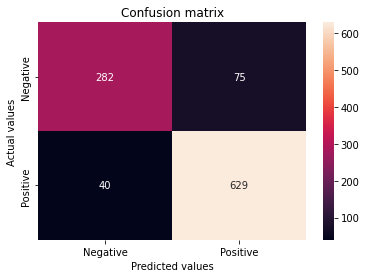

              precision    recall  f1-score   support

    Negative       0.85      0.65      0.74        97
    Positive       0.81      0.93      0.87       160

    accuracy                           0.82       257
   macro avg       0.83      0.79      0.80       257
weighted avg       0.83      0.82      0.82       257



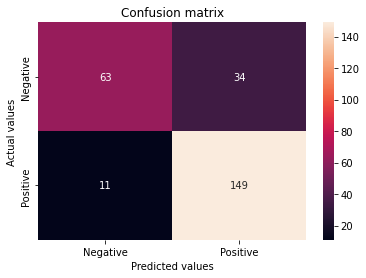

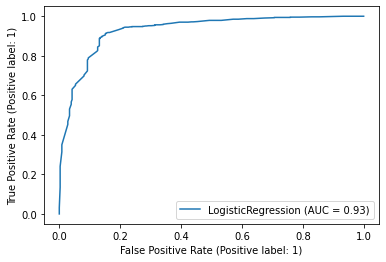

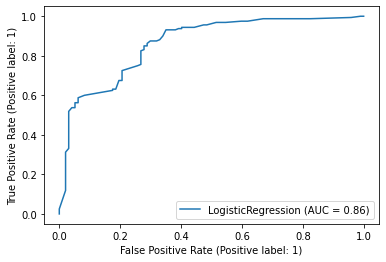

,input,output_proba,output_class
0,heart_eyes,"(0.0690459925648299, 0.9309540074351701)",1
1,kissing_heart kissing_heart kissing_heart hear...,"(0.0639276610567524, 0.9360723389432476)",1
2,relieved,"(0.7222422050450168, 0.2777577949549832)",0
3,sob sob sob persevere persevere persevere pers...,"(0.6086211652496625, 0.39137883475033747)",0
4,heart heart,"(0.03977199088274086, 0.9602280091172591)",1
...,...,...,...
1021,gift_heart,"(0.3500220073124234, 0.6499779926875766)",1
1022,heart,"(0.03977199088274086, 0.9602280091172591)",1
1023,hugs wink,"(0.3321253514338075, 0.6678746485661925)",1
1024,blush blush blush blush blush blush blush blus...,"(0.13724536542157273, 0.8627546345784273)",1


,input,output_proba,output_class
0,wink,"(0.3712072811835553, 0.6287927188164447)",1
1,heart,"(0.03977199088274086, 0.9602280091172591)",1
2,rofl rofl,"(0.3070906240706651, 0.6929093759293349)",1
3,thumbsup thumbsup thumbsup thumbsup thumbsup t...,"(0.1682098403308303, 0.8317901596691697)",1
4,heart_eyes heart_eyes,"(0.0690459925648299, 0.9309540074351701)",1
...,...,...,...
252,shit,"(0.5461358590363463, 0.4538641409636537)",0
253,joy,"(0.2386855657399103, 0.7613144342600897)",1
254,disappointed disappointed disappointed disappo...,"(0.7608262221340357, 0.23917377786596428)",0
255,cry,"(0.6713100653363226, 0.3286899346636773)",0


In [23]:
y_train_pred = logistic_model.predict(X_train['emoji_decode'])
y_test_pred = logistic_model.predict(X_test['emoji_decode'])

Model.confusionMatrix(y_train, y_train_pred['output_class'])
Model.confusionMatrix(y_test, y_test_pred['output_class'])

logistic_model.rocAuc(X_train['emoji_decode'], y_train)
logistic_model.rocAuc(X_test['emoji_decode'], y_test)

display(y_train_pred, y_test_pred)

              precision    recall  f1-score   support

    Negative       0.88      0.80      0.84       357
    Positive       0.90      0.94      0.92       669

    accuracy                           0.89      1026
   macro avg       0.89      0.87      0.88      1026
weighted avg       0.89      0.89      0.89      1026



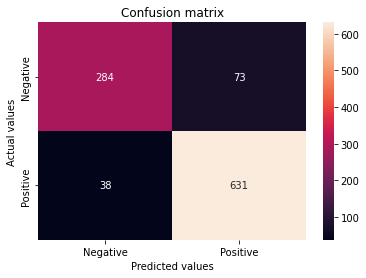

              precision    recall  f1-score   support

    Negative       0.82      0.67      0.74        97
    Positive       0.82      0.91      0.86       160

    accuracy                           0.82       257
   macro avg       0.82      0.79      0.80       257
weighted avg       0.82      0.82      0.82       257



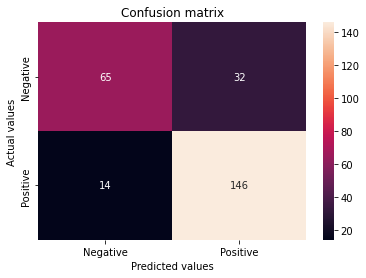

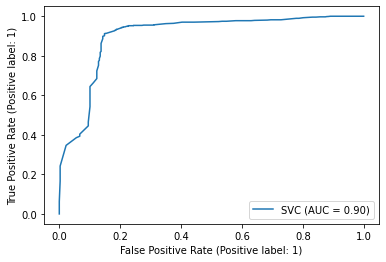

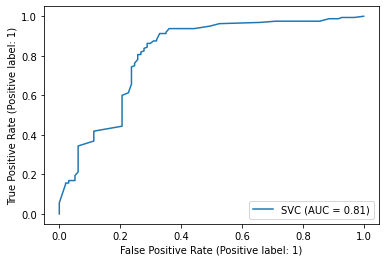

,input,output_proba,output_class
0,heart_eyes,"(0.10266231365321639, 0.8973376863467836)",1
1,kissing_heart kissing_heart kissing_heart hear...,"(0.10232899031493847, 0.8976710096850615)",1
2,relieved,"(0.867374421854991, 0.13262557814500886)",0
3,sob sob sob persevere persevere persevere pers...,"(0.7574393894608992, 0.24256061053910113)",0
4,heart heart,"(0.09273168262614771, 0.9072683173738522)",1
...,...,...,...
1021,gift_heart,"(0.10270967458866774, 0.8972903254113321)",1
1022,heart,"(0.09273168262614771, 0.9072683173738522)",1
1023,hugs wink,"(0.10272172235742406, 0.897278277642576)",1
1024,blush blush blush blush blush blush blush blus...,"(0.10269418172196916, 0.8973058182780309)",1


,input,output_proba,output_class
0,wink,"(0.14995291012493978, 0.8500470898750603)",1
1,heart,"(0.09273168262614771, 0.9072683173738522)",1
2,rofl rofl,"(0.10263782191175236, 0.8973621780882477)",1
3,thumbsup thumbsup thumbsup thumbsup thumbsup t...,"(0.09508878763041478, 0.9049112123695854)",1
4,heart_eyes heart_eyes,"(0.10266231365321639, 0.8973376863467836)",1
...,...,...,...
252,shit,"(0.7657189508922359, 0.23428104910776407)",0
253,joy,"(0.10265509139923557, 0.8973449086007645)",1
254,disappointed disappointed disappointed disappo...,"(0.8672722047277136, 0.13272779527228637)",0
255,cry,"(0.8674118652597433, 0.13258813474025677)",0


In [24]:
y_train_pred = svc_model.predict(X_train['emoji_decode'])
y_test_pred = svc_model.predict(X_test['emoji_decode'])

Model.confusionMatrix(y_train, y_train_pred['output_class'])
Model.confusionMatrix(y_test, y_test_pred['output_class'])

svc_model.rocAuc(X_train['emoji_decode'], y_train)
svc_model.rocAuc(X_test['emoji_decode'], y_test)

display(y_train_pred, y_test_pred)

              precision    recall  f1-score   support

    Negative       0.85      0.86      0.86       357
    Positive       0.92      0.92      0.92       669

    accuracy                           0.90      1026
   macro avg       0.89      0.89      0.89      1026
weighted avg       0.90      0.90      0.90      1026



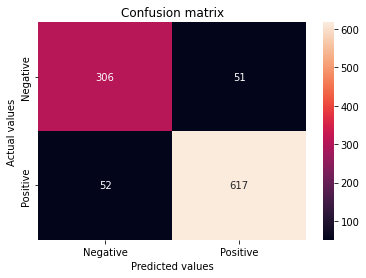

              precision    recall  f1-score   support

    Negative       0.75      0.68      0.71        97
    Positive       0.82      0.86      0.84       160

    accuracy                           0.79       257
   macro avg       0.78      0.77      0.78       257
weighted avg       0.79      0.79      0.79       257



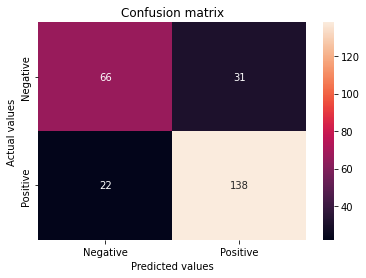

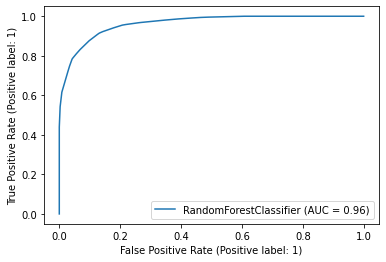

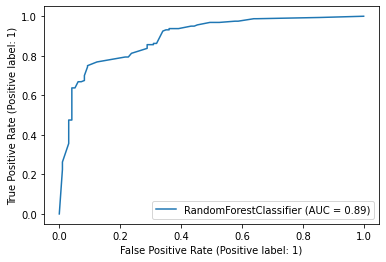

,input,output_proba,output_class
0,heart_eyes,"(0.03921568627450975, 0.9607843137254879)",1
1,kissing_heart kissing_heart kissing_heart hear...,"(0.0, 1.0)",1
2,relieved,"(0.833333333333333, 0.16666666666666646)",0
3,sob sob sob persevere persevere persevere pers...,"(0.0, 1.0)",1
4,heart heart,"(0.014285714285714256, 0.9857142857142847)",1
...,...,...,...
1021,gift_heart,"(0.0, 1.0)",1
1022,heart,"(0.014285714285714256, 0.9857142857142847)",1
1023,hugs wink,"(0.0, 1.0)",1
1024,blush blush blush blush blush blush blush blus...,"(0.09523809523809508, 0.904761904761903)",1


,input,output_proba,output_class
0,wink,"(0.5, 0.5)",0
1,heart,"(0.014285714285714256, 0.9857142857142847)",1
2,rofl rofl,"(0.3125, 0.6875)",1
3,thumbsup thumbsup thumbsup thumbsup thumbsup t...,"(0.04983552631578947, 0.9501644736842105)",1
4,heart_eyes heart_eyes,"(0.03921568627450975, 0.9607843137254879)",1
...,...,...,...
252,shit,"(1.0, 0.0)",0
253,joy,"(0.2631578947368424, 0.7368421052631585)",1
254,disappointed disappointed disappointed disappo...,"(0.9000000000000008, 0.09999999999999981)",0
255,cry,"(0.7777777777777771, 0.22222222222222177)",0


In [25]:
y_train_pred = rdforest_model.predict(X_train['emoji_decode'])
y_test_pred = rdforest_model.predict(X_test['emoji_decode'])

Model.confusionMatrix(y_train, y_train_pred['output_class'])
Model.confusionMatrix(y_test, y_test_pred['output_class'])

rdforest_model.rocAuc(X_train['emoji_decode'], y_train)
rdforest_model.rocAuc(X_test['emoji_decode'], y_test)

display(y_train_pred, y_test_pred)

In [26]:
Model.saveByPickle(svc_model, "./models/svc_model_emojis.pickle")
Model.saveByPickle(logistic_model, "./models/logistic_model_emojis.pickle")
Model.saveByPickle(rdforest_model, "./models/rdforest_model_emojis.pickle")

<modules.model.SentimentModel object at 0x7f086a7a0160> has been saved at ./models/svc_model_emojis.pickle.
<modules.model.SentimentModel object at 0x7f086a6eadf0> has been saved at ./models/logistic_model_emojis.pickle.
<modules.model.SentimentModel object at 0x7f086a6eae80> has been saved at ./models/rdforest_model_emojis.pickle.
